## Coin-flip experiment and the Central Limit Theorem

This notebook is copy of the posted solution for the second in-class exercise done
on the coin-flipping simulation, with four additional lines of code in the final
cell.

The goal is to test whether the distribution of the number of heads that you 
get in repeated experiments of flipping a fair coin 100 times is a normal distribution.

In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Simulating spin flips

I am going to generate 100 random 0's and 1's, and let 1 represent a "heads" and 0 represent a "tails."

In [4]:
n_flips = 20 # Number of spin flips
data = stats.randint.rvs(0, 2, size=n_flips)
print(data)

[0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0]


I can count the "heads" by summing the array `data`. 

In [5]:
n_heads = np.sum(data)
print(n_heads)

7


#### Simulating many trials of 200 spin flips
I store the number of heads in each trial in the array `results`.

In [6]:
n_expts = 200   
results = np.zeros(n_expts) # Create array in which to store results of experiments

for i in range(n_expts):
    results[i] = np.sum(stats.randint.rvs(0, 2, size=n_flips))

#### Histogram of results
Choose bin boundaries so that each bin includes a single integer, e.g.,
$[47.5, 48.5]$, $[48.5,49.5]$, $[49.5, 50.5]$, etc.

<IPython.core.display.Javascript object>


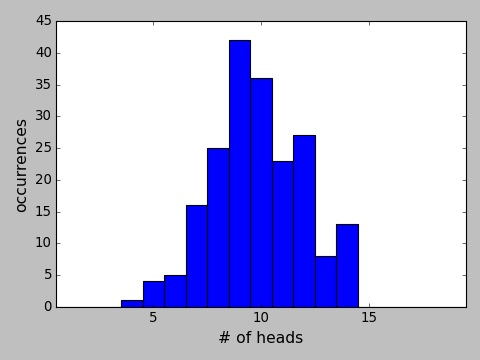

In [7]:
low = 0.5
high = 19.5
nbins = int(high-low) 
plt.figure()
plt.xlabel("# of heads")
plt.ylabel("occurrences")
h_out = plt.hist(results, nbins, [low,high])
plt.xlim(low,high);

#### Increasing the number of trials.

In [8]:
n_expts = 10000   
results = np.zeros(n_expts) # Create array in which to store results of experiments

for i in range(n_expts):
    results[i] = np.sum(stats.randint.rvs(0, 2, size=n_flips))

<IPython.core.display.Javascript object>


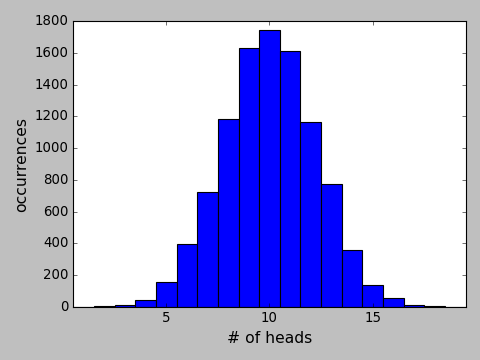

In [9]:
low = 0.5
high = 19.5
nbins = int(high - low)
plt.figure()
plt.xlabel("# of heads")
plt.ylabel("occurrences")
out = plt.hist(results, nbins, [low,high])
plt.xlim(low,high);

##  Checking Central Limit Theorem
Following Hughes and Hase statement of the Central Limit Theorem at the 
top of p.33, we should look at the distribution of the sample mean:

$$
\langle x\rangle = \frac{1}{N}(x_1 + x_2 + \cdots + x_N).
$$

It's the distribution of the sample mean that approaches the normal distribution.

The individual values $x_i$ are sampled from a discrete distribution with two values:
$x_i = 0$ with a probability of 0.5, and $x_i = 1$ with a probability 0.5.  The 
mean of this parent distribution for the $x_i$'s is $\langle x\rangle = 0.5$, and the 
standard deviation of this parent distribution is $\sigma = 0.5$.

The histogram below is the same as the histogram immediately above, except that the 
results for the number of heads in each trial have been divided by $N$, the number of 
coin-flips in a trial (in this example 100).

The Central Limit Theorem states that total number of heads divided by the number of 
flips (100) should tend toward a normal distribution with a mean of 0.5 and a standard deviation of $\sigma_\text{parent}/\sqrt{100}$.  Let's check.

<IPython.core.display.Javascript object>


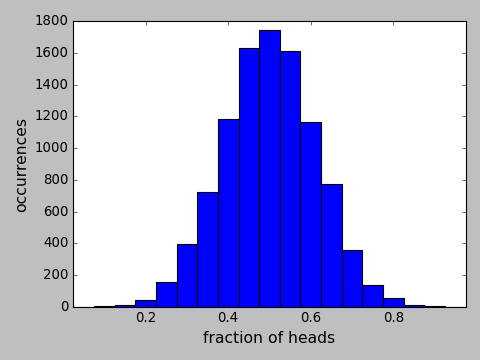

In [10]:
low = 0.5/n_flips
high = 19.5/n_flips
# Don't change number of bins from previous histogram
plt.figure()
plt.xlabel("fraction of heads")
plt.ylabel("occurrences")
h_out = plt.hist(results/n_flips, nbins, [low,high])
plt.xlim(low,high);

#### Check the standard deviation

In [11]:
print("sample mean =", np.mean(results/n_flips), ", sample std =", np.std(results/n_flips))

sample mean = 0.49959499999999996 , sample std = 0.11188648700803865


In [12]:
sigma_parent = 1/2
print("predicted std =", sigma_parent/np.sqrt(n_flips) )

predicted std = 0.11180339887498948


#### We can check more than just the numerical value of the standard deviation
Use the CDF of the normal distribution and the bin boundaries to determine the expected occurrences for a normal distribution:

\begin{eqnarray*}
P(x_1<x<x_2) &=& \int_{x_1}^{x_2} P_{DF}(x)\, dx \\
             &=& \int_{-\infty}^{x_2} P_{DF}(x)\, dx 
               - \int_{-\infty}^{x_1} P_{DF}(x)\, dx \\
             &=& C_{DF}(x_2) - C_{DF}(x_1)
\end{eqnarray*}


<b>Note:</b> Information about the occurrences and bin boundaries is part of the output of the `plt.hist()` function.  (I gave this output the name `h_out` in the plotting cell above.) `h_out[0]` is an array with the counts in each bin, and `h_out[1]` is an array with the bin boundaries.

In [13]:
h_out

(array([   0.,    2.,    8.,   42.,  157.,  396.,  722., 1185., 1631.,
        1747., 1612., 1168.,  772.,  357.,  136.,   52.,    9.,    4.,
           0.]),
 array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
        0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
        0.925, 0.975]),
 <BarContainer object of 19 artists>)

<IPython.core.display.Javascript object>


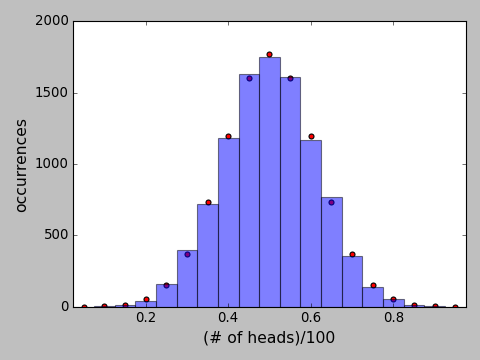

In [14]:
low = 0.5/n_flips
high = 19.5/n_flips
# use nbins previously defined
plt.figure()
plt.xlabel("(# of heads)/100")
plt.ylabel("occurrences")
h_out = plt.hist(results/n_flips, nbins, [low,high], alpha = 0.5)
plt.xlim(low,high);

x = np.zeros(len(h_out[1])-1)   # Create array for mid-points of histogram bins
y = np.zeros(len(h_out[1])-1)   # Create array for expected occurences from normal dist.
for i in range(len(x)):
    x[i] = (h_out[1][i+1] + h_out[1][i])/2
    y[i] = n_expts*(stats.norm.cdf(h_out[1][i+1],0.5,0.5/np.sqrt(n_flips))\
                    - stats.norm.cdf(h_out[1][i],0.5,0.5/np.sqrt(n_flips)))
    
plt.scatter(x, y, c = 'red');

#### Looks pretty Gaussian!!

In a future class we will talk about how to make quantitative assessments of confidence 
about whether a sample of random variables comes from a given distribution.

## Cell added to work done in class

#### With the tools of H&H Chapter 8, we can now do a better job of answering the question.
We have to calculate the $\chi^2$ statistic:

$$
\chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i},
$$ 

where $E_i$ is the expected value occurring is some range of values, and $O_i$ 
is the observed number.

The observed values are part of the output of the `plt.hist` function, 
and the expected values were calculated as the elements of the array `y` that 
were calculated for plotting along with the histogram.

Note that there are no constraints, because no parameters were calculated from the 
data.  The null hypothesis of a fair coin is enough information to determine 
everythin about the expected distribution.

In [15]:
o = h_out[0]    # Observed values
e = y           # Expected values
dof = len(o)    # Numbers of degrees of freedom
chisq = np.sum((e-o)**2/e)
print('chisq = ', chisq)
print('reduced chisq =', chisq/len(o))
print('probability =', 1 - stats.chi2.cdf(chisq, dof))

chisq =  16.538729364095666
reduced chisq = 0.8704594402155613
probability = 0.6210862886126964


 The reduced $\chi^2$ is about 1, and the probability of getting a value of $\chi^2$
 this large is about 60%.
 
 #### No evidence that this isn't gaussian!

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [16]:
%load_ext version_information

In [17]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 09:27:24 2020 EDT